# HOMEWORK 14

In this homework we will be working with the Fashion MNIST dataset. You will be given a classifier which suffers from considerable overfitting. Your objective will be to employ regularization techniques to mitigate the overfitting problem.

Let's start with the usual imports.

In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, Input, MaxPooling2D, BatchNormalization
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Dataset

The MNIST fashgion dataset [link](https://github.com/zalandoresearch/fashion-mnist) was build by Zalando Reasearch tem consists of monochrome images of different type of clothing, namely:
* 0	T-shirt/top
* 1	Trouser
* 2	Pullover
* 3	Dress
* 4	Coat
* 5	Sandal
* 6	Shirt
* 7	Sneaker
* 8	Bag
* 9	Ankle boot

It is also one of the Keras built-in datasets. Let's load the images and quickly inspect it.

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


Let's visualise some random samples.

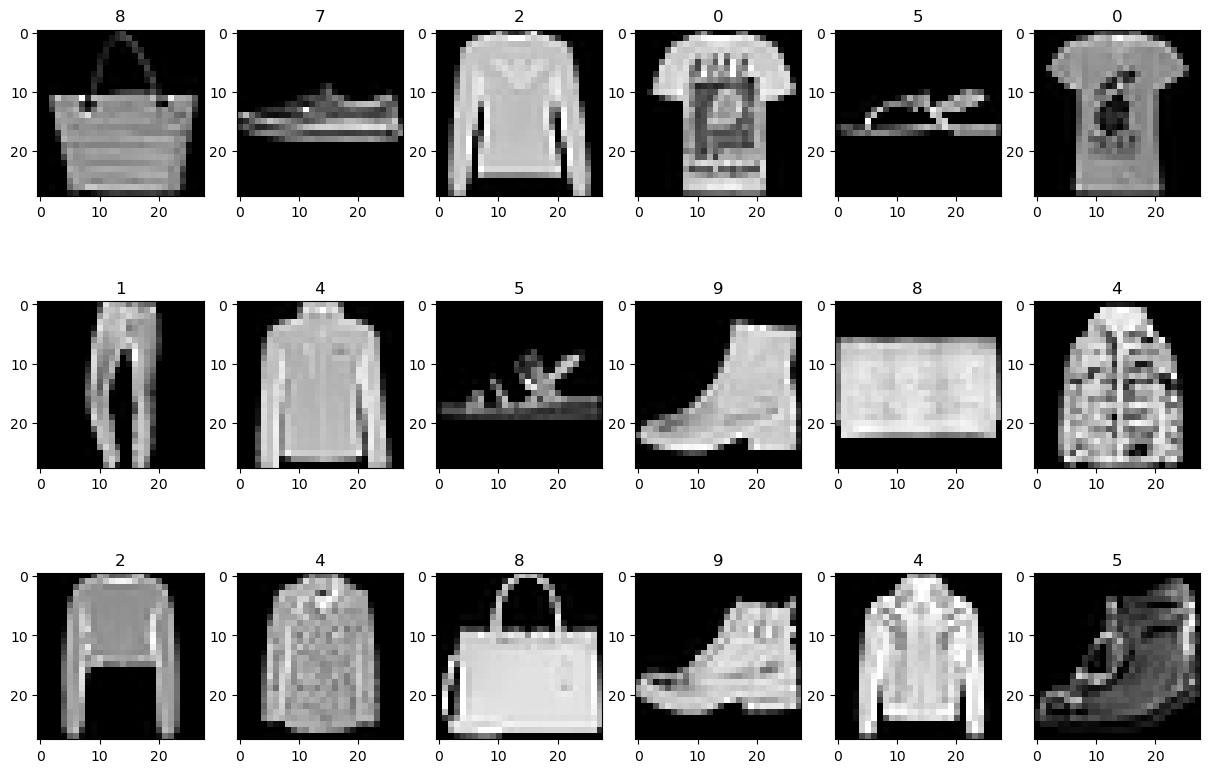

In [3]:
cnt = 1
for r in range(3):
    for c in range(6):
        idx = np.random.randint(len(x_train))
        plt.subplot(3,6,cnt)
        plt.imshow(x_train[idx, ...], cmap='gray')
        plt.title(y_train[idx])
        cnt = cnt + 1

### Building the Classifier

We are now going to build the baseline classifier that you will use throughout this homework.

In [4]:
# Data normalization
x_train = x_train/255
x_test = x_test/255

In [5]:
inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(128)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3,213,002
Trainable params: 3,213,002
Non-trainable params: 0
_________________________________________________________________


In [6]:
epochs = 50
batch_size = 64

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
938/938 [==============================] - 17s 18ms/step - loss: 0.3851 - accuracy: 0.8637 - val_loss: 0.3295 - val_accuracy: 0.8811
Epoch 2/50
938/938 [==============================] - 17s 18ms/step - loss: 0.2611 - accuracy: 0.9063 - val_loss: 0.2947 - val_accuracy: 0.8942
Epoch 3/50
938/938 [==============================] - 17s 18ms/step - loss: 0.2220 - accuracy: 0.9195 - val_loss: 0.3064 - val_accuracy: 0.8941
Epoch 4/50
938/938 [==============================] - 17s 18ms/step - loss: 0.1906 - accuracy: 0.9304 - val_loss: 0.3048 - val_accuracy: 0.8968
Epoch 5/50
938/938 [==============================] - 17s 18ms/step - loss: 0.1688 - accuracy: 0.9384 - val_loss: 0.3191 - val_accuracy: 0.8956
Epoch 6/50
938/938 [==============================] - 17s 18ms/step - loss: 0.1506 - accuracy: 0.9455 - val_loss: 0.3127 - val_accuracy: 0.9019
Epoch 7/50
938/938 [==============================] - 17s 18ms/step - loss: 0.1326 - accuracy: 0.9512 - val_loss: 0.3332 - val_accuracy:

Train Acc      0.9957500100135803
Validation Acc 0.8838000297546387


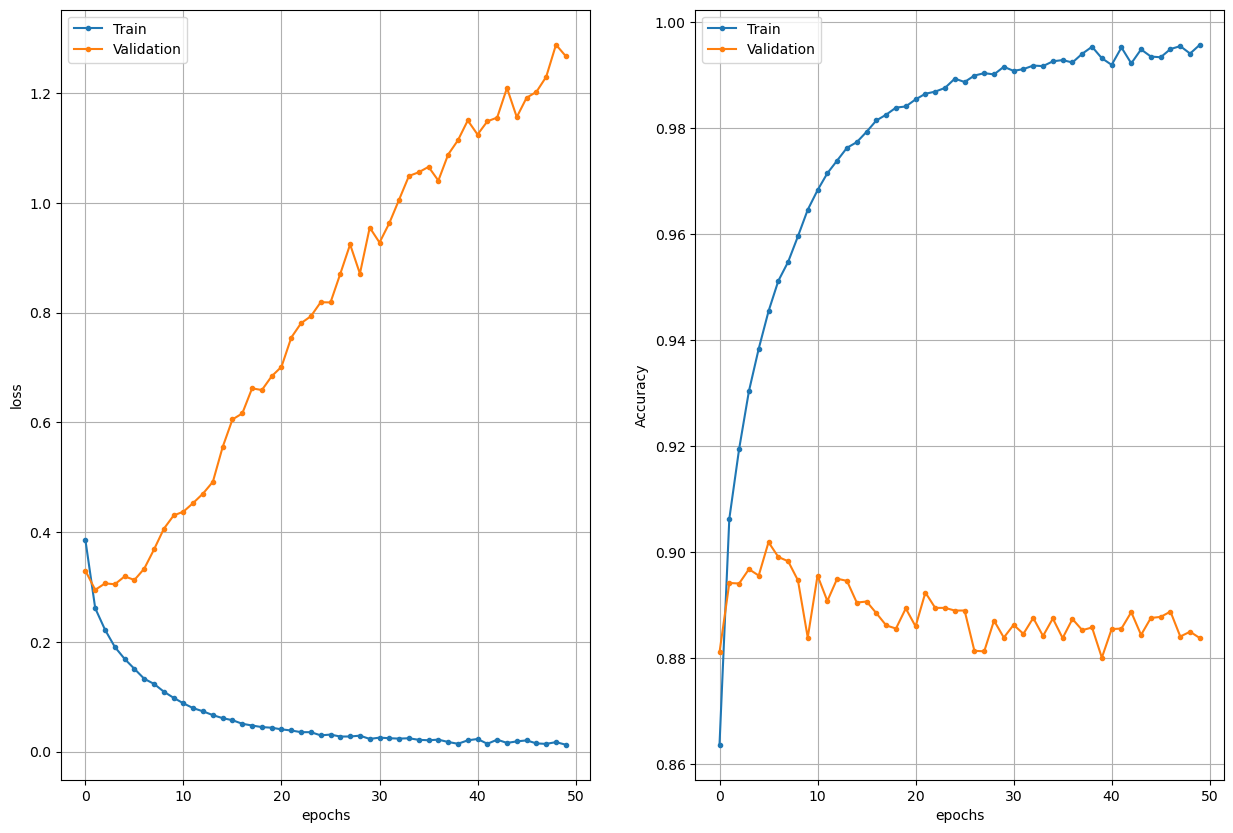

In [7]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)

As you can see, the classifier suffers from massive overfitting. The validation accuracy is around 88% while the training accuracy is close to 1.

### Combat the Overfitting!

Now it is your turn. Use the classifier as a baseline, include some regularization techniques and try to improve the classification performance. You can try any techniques you might see fit, e.g.,
* Dropout
* Batch normalization
* Weight regularization
* Data augmentation
* Early stopping
* Pooling
* Reducing the number of parameters (the size of the network)
* ...

There are to objective you shall fulfill in order to successfully complete this homework:
* The validation accuracy shall be above 91%
* Your network (with all the regularizations applied) shall **not** be larger than the baseline

In [27]:
# Modify the baseline classifier in order to reduce the overfitting and make the performance more robust

inputs = Input(shape=(28, 28, 1))
net = Conv2D(32, kernel_size=(3, 3), activation="relu", padding='same')(inputs)
net = Flatten()(net)
net = Dense(64)(net)
net = Dropout(0.25)(net)
outputs = Dense(10, activation="softmax")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_9 (Flatten)         (None, 25088)             0         
                                                                 
 dense_18 (Dense)            (None, 64)                1605696   
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_19 (Dense)            (None, 10)                650       
                                                                 
Total params: 1,606,666
Trainable params: 1,606,666
Non-tra

In [29]:
from sklearn.utils import shuffle

def datagen(x, y, batch_size):
    num_samples = len(y)
    while True:
        for idx in range(0, num_samples, batch_size):
            x_ = x[idx:idx + batch_size, ...]
            y_ = y[idx:idx + batch_size]
            
            if len(y_) < batch_size:
                x, y = shuffle(x, y)
                break
            
            # Augmentation
            for idx_aug in range(batch_size):
                if np.random.rand() > 0.5:
                    x_[idx_aug, ...] = np.fliplr(x_[idx_aug, ...])                                
                    
            yield x_, y_

In [30]:
# Train the network
epochs = 50
batch_size = 64

steps_per_epoch = len(y_train) // batch_size
generator = datagen(x_train, y_train, batch_size)

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/50
937/937 [==============================] - 14s 14ms/step - loss: 0.4552 - accuracy: 0.8432 - val_loss: 0.3684 - val_accuracy: 0.8710
Epoch 2/50
937/937 [==============================] - 13s 14ms/step - loss: 0.3229 - accuracy: 0.8860 - val_loss: 0.3247 - val_accuracy: 0.8849
Epoch 3/50
937/937 [==============================] - 13s 14ms/step - loss: 0.2883 - accuracy: 0.8981 - val_loss: 0.3097 - val_accuracy: 0.8927
Epoch 4/50
937/937 [==============================] - 13s 14ms/step - loss: 0.2615 - accuracy: 0.9076 - val_loss: 0.3028 - val_accuracy: 0.8915
Epoch 5/50
937/937 [==============================] - 13s 14ms/step - loss: 0.2465 - accuracy: 0.9126 - val_loss: 0.3004 - val_accuracy: 0.8952
Epoch 6/50
937/937 [==============================] - 14s 15ms/step - loss: 0.2288 - accuracy: 0.9186 - val_loss: 0.2910 - val_accuracy: 0.8977
Epoch 7/50
937/937 [==============================] - 13s 14ms/step - loss: 0.2187 - accuracy: 0.9218 - val_loss: 0.2941 - val_accuracy:

Train Acc      0.9753201603889465
Validation Acc 0.8949000239372253


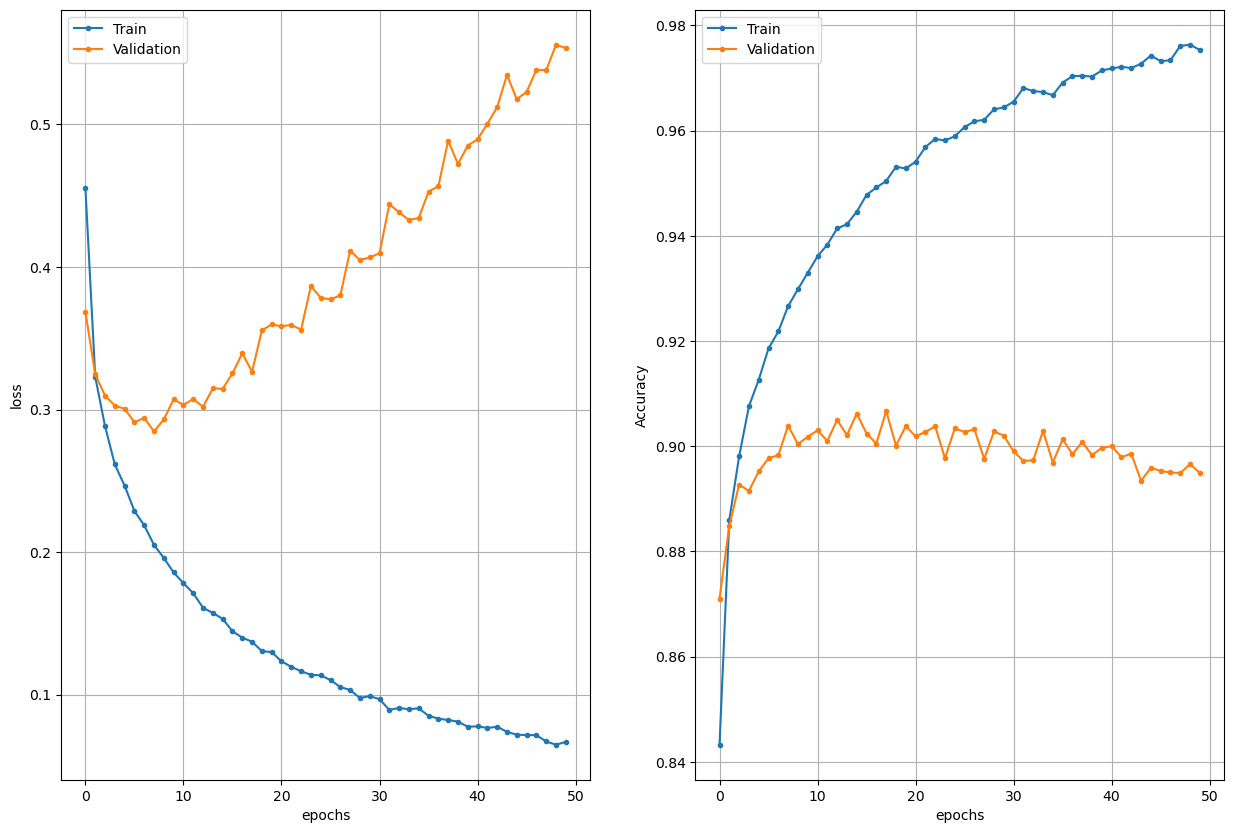

In [31]:
# Show the results
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])
        
    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])
    
plot_history(history)


### Questions

* What have you done in order to improve the performance? 
* Have you tried configurations that did not work out?

### Answers
* Changing layer to Dense(64) increased Validation Acc for 1%
* I have checked: 
    * Dropout with 0.2, but the is no incat on accurecy
    * Data augmentation (np.fliplr) decreases accurency
    * Also I do not see reason to use other data augmentation: to change the colour becouse of monochrome, and any rotation for the angle becouse position has sence
    * Early stopping also looks unapplicable